In [3]:
import numpy as np
import matplotlib.pyplot as plt

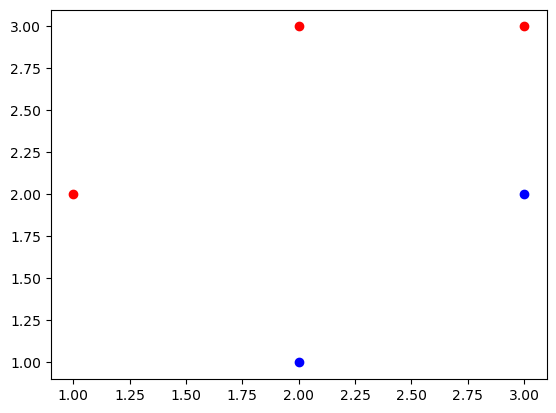

In [4]:
data=  [[1,2, 1],
        [2,3, 1],
        [3,3, 1],
        [2,1, -1],
        [3,2, -1],]
data=np.array(data)
x,y=data[:,:-1],data[:,-1]
plt.scatter(x[:3,0],x[:3,1],color='r') #红色为正实例点
plt.scatter(x[3:,0],x[3:,1],color='b') #绿色为负实例点
#其实我们通过观察可知，这些点是可以用一条直线将其分开，属于线性可分

In [ ]:
class SVM(w_num=2):
    def __init__(self, f_num):
        self.f_num = f_num
        self.w = np.zeros(f_num)
        self.b = 0
    def sign(self, x):
        y = np.dot(self.w, x) + self.b
        
    def fit(self,x,y):
        is_wrong = False
        while not is_wrong:
            wrong_count = 0
            for d in range(len(x)):
                fuc_d=y[d] * (np.dot(self.w, x[d]) + self.b) #函数间隔
                #几何间隔 = 函数间隔 / ||w||
                gep_d=fuc_d / abs(self.w) #几何间隔
                if  fuc_d<= 0:
                    self.w = self.w +  np.dot(y[d], x[d])
                    self.b = self.b +  y[d]
                    wrong_count += 1
            if wrong_count == 0:
                is_wrong = True
    def predict(self, x):
        return np.sign(np.dot(self.w, x) + self.b)
    def sign(self,x):
        return np.sign(np.dot(self.w, x) + self.b)

In [9]:
abs(np.array([-1,-2]))

array([1, 2])

In [21]:
from sklearn import svm
clf = svm.SVC(kernel='linear',C=10000)
clf.fit(x, y)
print(f"W:{clf.coef_}") #
print(f"b:{clf.intercept_}") #截距

W:[[-1.  2.]]
b:[-2.]


分离超平面是 w*x+b
分类决策函数是 sign(w*x+b)
分离平面

In [19]:
clf.coef_

array([[-1.,  2.]])

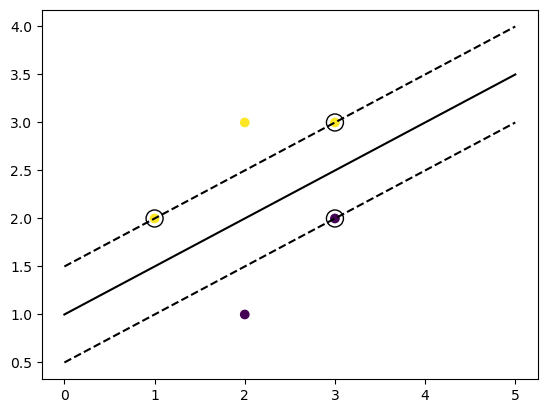

In [17]:
plt.scatter(x[:,0],x[:,1],c=y)
#我们就只在0-5这个区间展示作图
xaxis = np.linspace(0, 5)
w = clf.coef_[0]  #
a = -w[0] / w[1] #斜率
y_sep = a * xaxis - (clf.intercept_[0]) / w[1] #分离超平面
b = clf.support_vectors_[0] #支持向量1
yy_down = a * xaxis + (b[1] - a * b[0]) #
b = clf.support_vectors_[-1] #支持向量3
yy_up = a * xaxis + (b[1] - a * b[0])
plt.plot(xaxis, y_sep, 'k-') #分离超平面
plt.plot(xaxis, yy_down, 'k--') #分离超平面-上界
plt.plot(xaxis, yy_up, 'k--') #分离超平面-下界
plt.scatter (clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=150, facecolors='none', edgecolors='k')
plt.show()

In [62]:
clf.support_vectors_

array([[3., 2.],
       [1., 2.],
       [3., 3.]])

In [11]:
clf.support_vectors_

array([[3., 2.],
       [1., 2.],
       [3., 3.]])

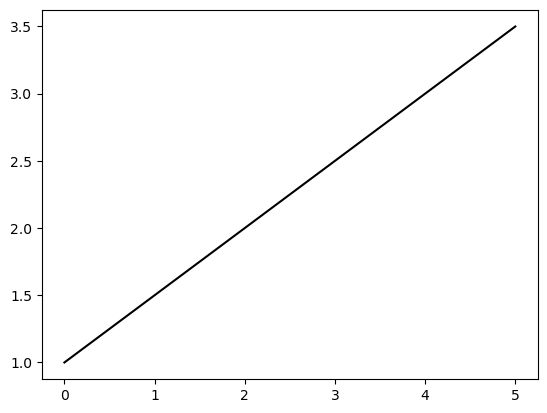